In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("ElectricCarData_Norm.csv")

In [6]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [7]:
df.describe()

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [8]:
df.tail()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5 sec,190 km/h,400 km,238 Wh/km,480 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,62000


In [9]:
df.shape

(103, 14)

In [10]:
df.isnull().any()

Brand          False
Model          False
Accel          False
TopSpeed       False
Range          False
Efficiency     False
FastCharge     False
RapidCharge    False
PowerTrain     False
PlugType       False
BodyStyle      False
Segment        False
Seats          False
PriceEuro      False
dtype: bool

In [11]:
df[['FastCharge','TopSpeed','Range','Efficiency','Accel']] = df[['FastCharge','TopSpeed','Range','Efficiency','Accel']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

In [12]:
df['FastCharge']=df['FastCharge'].str.replace('-','0')

In [13]:
df['FastCharge']=df['FastCharge'].astype(float)

In [14]:
df['FastCharge'].mean()

434.56310679611653

In [15]:
df['FastCharge']=df['FastCharge'].replace(0,434.56)

In [16]:
df['FastCharge'].unique()

array([940.  , 250.  , 620.  , 560.  , 190.  , 220.  , 420.  , 650.  ,
       540.  , 440.  , 230.  , 380.  , 210.  , 590.  , 780.  , 170.  ,
       260.  , 930.  , 850.  , 910.  , 490.  , 470.  , 270.  , 450.  ,
       350.  , 710.  , 240.  , 390.  , 570.  , 610.  , 340.  , 730.  ,
       920.  , 434.56, 550.  , 900.  , 520.  , 430.  , 890.  , 410.  ,
       770.  , 460.  , 360.  , 810.  , 480.  , 290.  , 330.  , 740.  ,
       510.  , 320.  , 500.  ])

In [17]:
df1=df.drop(['Brand','Model'],axis=1)

df1.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,10.0,160,270,167,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,4.7,210,400,181,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,6.8,180,360,206,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,9.5,145,170,168,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


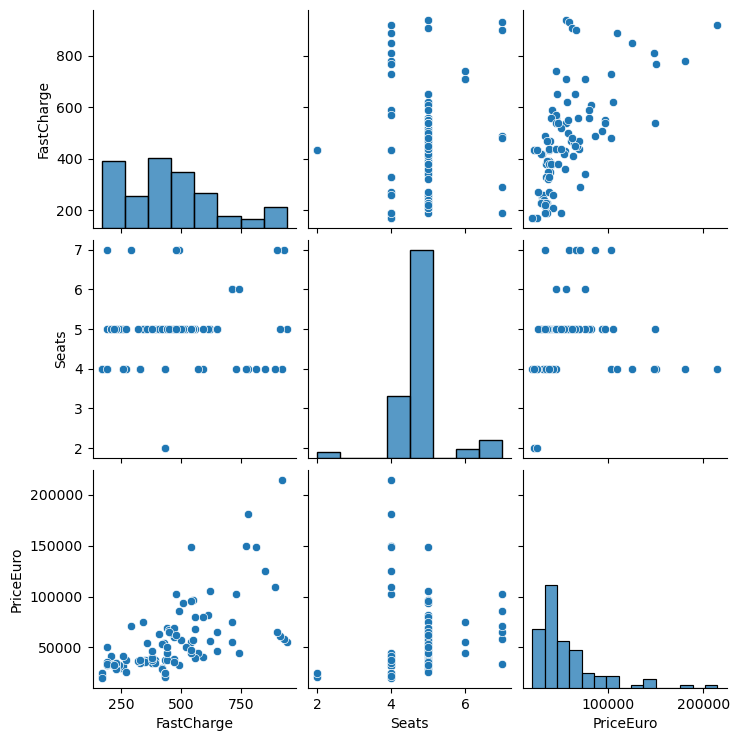

In [18]:
sns.pairplot(df1)
plt.show()

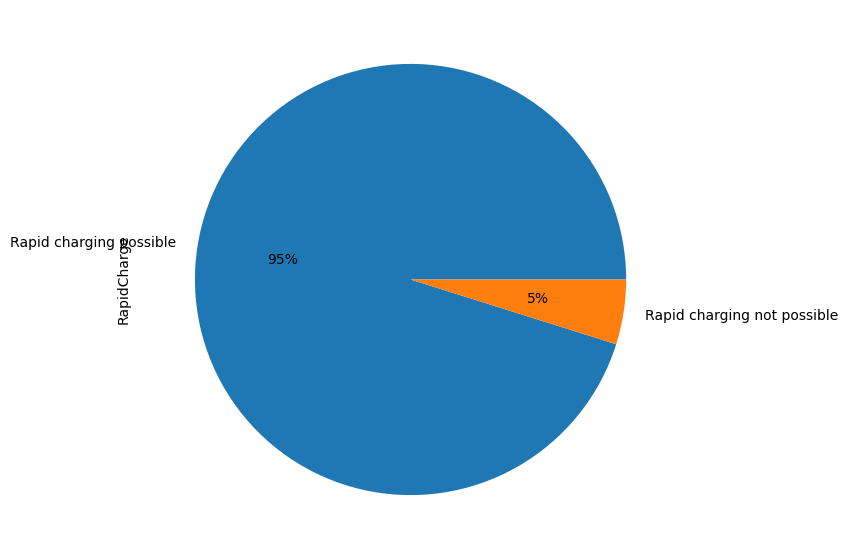

In [19]:
plt.figure(figsize=[9,7])
df1['RapidCharge'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

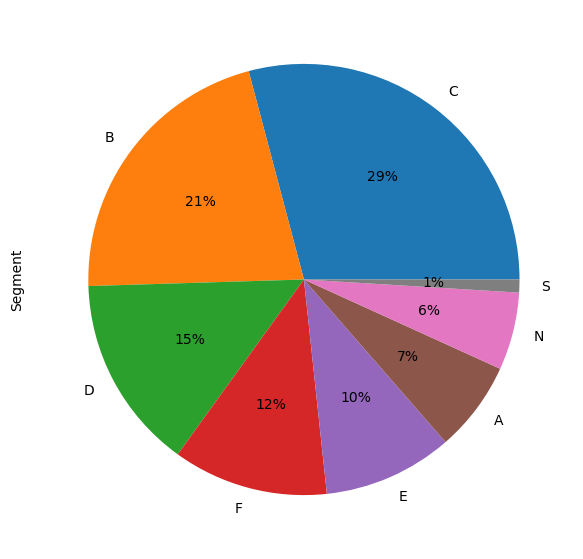

In [20]:
plt.figure(figsize=[9,7])
df1['Segment'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

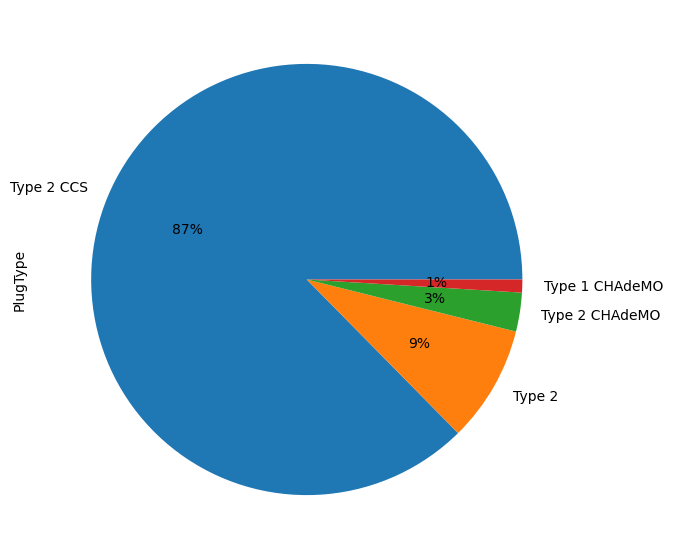

In [21]:
plt.figure(figsize=[9,7])
df1['PlugType'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

In [22]:
df1['TopSpeed'] = df1['TopSpeed'].astype(int)
df1['Range'] = df1['Range'].astype(int)
df1['Efficiency'] = df1['Efficiency'].astype(int)
df1['Accel'] = df1['Accel'].astype(float)

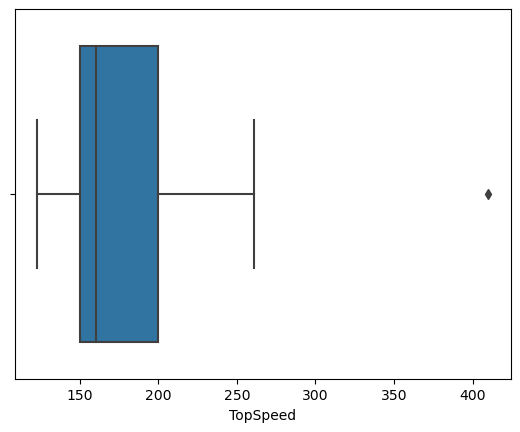

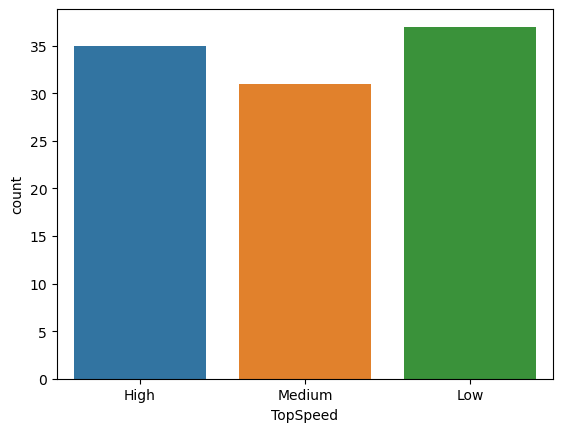

In [23]:
sns.boxplot(x=df1['TopSpeed'])
plt.show()
def convert(x):
     if x<160:
       return "Low"
     elif x>=160 and x<190:
       return "Medium"
     else:
       return "High"
converted_TopSpeed=df1['TopSpeed'].apply(convert)
sns.countplot(x=converted_TopSpeed)
plt.show()

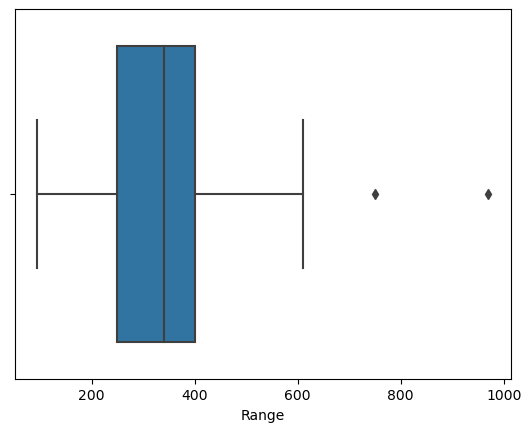

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


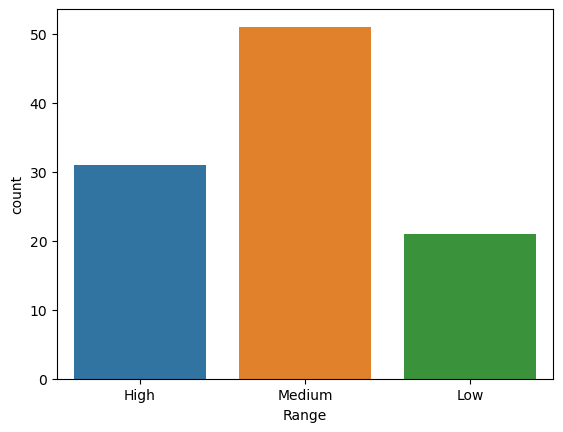

In [24]:
sns.boxplot(x=df1['Range'])
plt.show()
def convert1(x):
     if x<250:
       return "Low"
     elif x>=250 and x<400:
       return "Medium"
     else:
       return "High"
converted_Range=df1['Range'].apply(convert1)
sns.countplot(converted_Range)
plt.show()

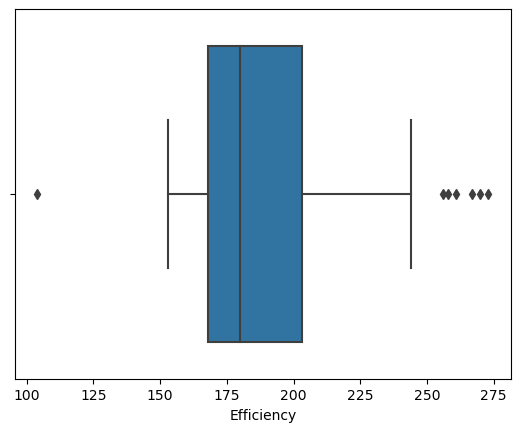

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


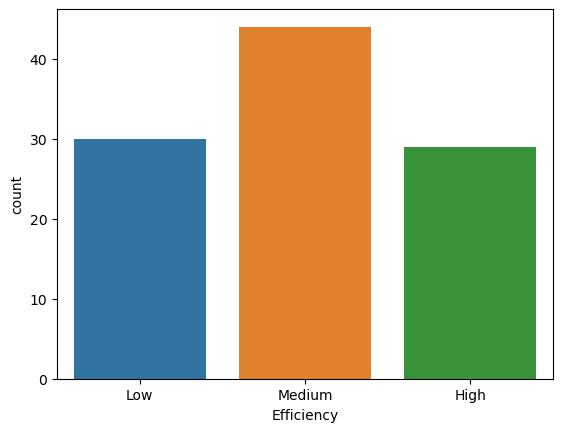

In [25]:
sns.boxplot(x=df1['Efficiency'])
plt.show()
def convert2(x):
     if x<170:
       return "Low"
     elif x>=170 and x<200:
       return "Medium"
     else:
       return "High"
converted_Eff=df1['Efficiency'].apply(convert2)
sns.countplot(converted_Eff)
plt.show()

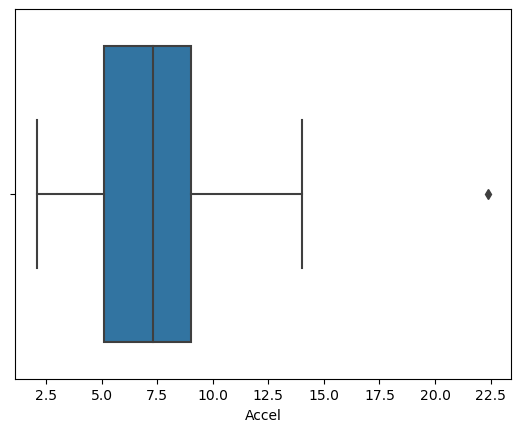

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


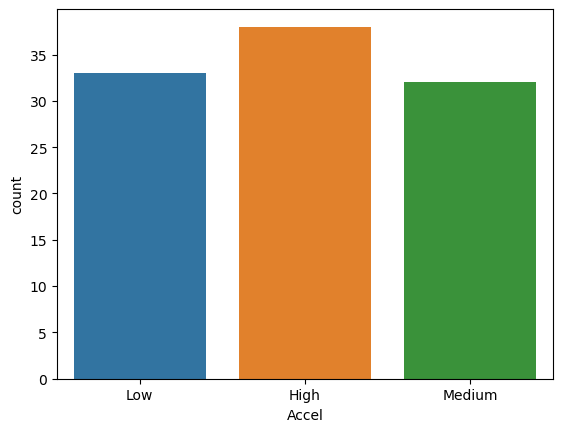

In [26]:
sns.boxplot(x=df1['Accel'])
plt.show()
def convert3(x):
     if x<6:
       return "Low"
     elif x>=6 and x<8:
       return "Medium"
     else:
       return "High"
converted_Acc=df1['Accel'].apply(convert3)
sns.countplot(converted_Acc)
plt.show()

In [27]:
df1 = df1.drop(columns=['RapidCharge','PlugType'])

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
oe1=OrdinalEncoder(categories=[['AWD', 'RWD', 'FWD']])
oe2=OrdinalEncoder(categories=[['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio','SPV', 'Station']])
oe3=OrdinalEncoder(categories=[['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S']])

In [30]:
df1 = pd.get_dummies(df1)
df1

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,PowerTrain_All Wheel Drive,PowerTrain_Front Wheel Drive,PowerTrain_Rear Wheel Drive,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,4.6,233,450,161,940.0,5,55480,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,10.0,160,270,167,250.0,5,30000,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,4.7,210,400,181,620.0,5,56440,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6.8,180,360,206,560.0,5,68040,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,9.5,145,170,168,190.0,4,32997,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440.0,5,45000,0,1,0,...,0,0,0,0,1,0,0,0,0,0
99,4.5,210,335,258,540.0,5,96050,1,0,0,...,0,0,0,0,0,0,1,0,0,0
100,5.9,200,325,194,440.0,5,50000,1,0,0,...,0,0,0,0,1,0,0,0,0,0
101,5.1,200,375,232,450.0,5,65000,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
df1=df1.astype(float)

In [32]:
cols_to_norm = ['Accel','TopSpeed','Range','Efficiency','FastCharge','PriceEuro']
df_prev=df1.copy()
df1[cols_to_norm] = df1[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [33]:
df1

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,PowerTrain_All Wheel Drive,PowerTrain_Front Wheel Drive,PowerTrain_Rear Wheel Drive,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,0.123153,0.383275,0.405714,0.337278,1.000000,5.0,0.181407,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.389163,0.128920,0.200000,0.372781,0.103896,5.0,0.050654,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.128079,0.303136,0.348571,0.455621,0.584416,5.0,0.186334,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.231527,0.198606,0.302857,0.603550,0.506494,5.0,0.245860,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.364532,0.076655,0.085714,0.378698,0.025974,4.0,0.066033,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.266010,0.128920,0.268571,0.514793,0.350649,5.0,0.127628,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99,0.118227,0.303136,0.274286,0.911243,0.480519,5.0,0.389596,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100,0.187192,0.268293,0.262857,0.532544,0.350649,5.0,0.153286,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
101,0.147783,0.268293,0.320000,0.757396,0.363636,5.0,0.230260,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.cluster import KMeans

C:\Users\manis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

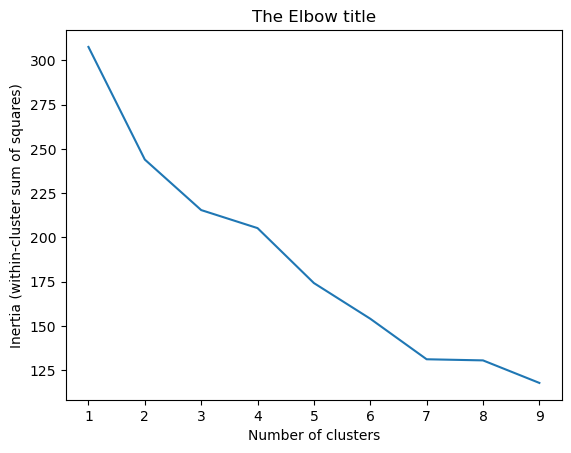

In [35]:
evs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)  
    kmeans.fit(df1)
    evs_iter = kmeans.inertia_
    evs.append(evs_iter)

number_clusters = range(1, 10)
plt.plot(number_clusters, evs)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [36]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df1)

C:\Users\manis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [37]:
identified_clusters = kmeanModel.fit_predict(df1)
identified_clusters

C:\Users\manis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 1, 0, 4, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 4, 1, 4, 2, 4, 2, 3,
       0, 1, 1, 0, 0, 1, 4, 2, 1, 2, 2, 3, 2, 2, 2, 4, 2, 1, 1, 2, 1, 4,
       4, 2, 2, 1, 1, 2, 1, 1, 2, 0, 3, 4, 2, 4, 2, 1, 2, 3, 2, 1, 0, 1,
       3, 3, 2, 1, 4, 1, 1, 1, 2, 2, 1, 4, 1, 1, 0, 3, 4, 0, 3, 4, 3, 1,
       1, 0, 1, 4, 2, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1])

In [38]:
data_with_clusters = df_prev.copy()
data_with_clusters['Clusters'] = identified_clusters 
data_with_clusters

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,PowerTrain_All Wheel Drive,PowerTrain_Front Wheel Drive,PowerTrain_Rear Wheel Drive,...,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S,Clusters
0,4.6,233.0,450.0,161.0,940.0,5.0,55480.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,10.0,160.0,270.0,167.0,250.0,5.0,30000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,4.7,210.0,400.0,181.0,620.0,5.0,56440.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,6.8,180.0,360.0,206.0,560.0,5.0,68040.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,9.5,145.0,170.0,168.0,190.0,4.0,32997.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160.0,330.0,191.0,440.0,5.0,45000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
99,4.5,210.0,335.0,258.0,540.0,5.0,96050.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
100,5.9,200.0,325.0,194.0,440.0,5.0,50000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
101,5.1,200.0,375.0,232.0,450.0,5.0,65000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [39]:
data_with_clusters['Clusters'].value_counts()

1    35
2    30
4    15
0    14
3     9
Name: Clusters, dtype: int64

In [40]:
Segment_wise_mean=data_with_clusters[['Accel','TopSpeed','Range','Efficiency','FastCharge','PriceEuro','Clusters','Seats']].groupby('Clusters').mean()

In [41]:
Segment_wise_mean

,Accel,TopSpeed,Range,Efficiency,FastCharge,PriceEuro,Seats
Clusters,,,,,,,
0,7.600000,173.928571,357.500000,182.428571,468.571429,44954.071429,5.000000
1,5.034286,215.285714,415.714286,204.971429,589.142857,85549.257143,4.800000
2,9.200000,151.700000,279.500000,173.366667,313.485333,35769.300000,4.966667
3,6.133333,200.111111,427.222222,225.777778,604.444444,65788.555556,6.666667
4,9.866667,142.333333,207.333333,168.200000,327.216000,30655.600000,3.733333


In [42]:
data_with_clusters[['Accel','TopSpeed','Range','Efficiency','FastCharge','PriceEuro','Clusters','Seats']].groupby('Clusters').min()

,Accel,TopSpeed,Range,Efficiency,FastCharge,PriceEuro,Seats
Clusters,,,,,,,
0,4.0,160.0,270.0,153.0,230.0,30000.0,5.0
1,2.1,150.0,280.0,104.0,340.0,45000.0,4.0
2,7.3,130.0,160.0,153.0,190.0,25500.0,4.0
3,2.8,123.0,190.0,171.0,190.0,33246.0,6.0
4,6.5,130.0,95.0,156.0,170.0,20129.0,2.0


In [43]:
data_with_clusters[['Accel','TopSpeed','Range','Efficiency','FastCharge','PriceEuro','Clusters','Seats']].groupby('Clusters').max()

,Accel,TopSpeed,Range,Efficiency,FastCharge,PriceEuro,Seats
Clusters,,,,,,,
0,10.0,225.0,450.0,222.0,650.0,68040.0,5.0
1,10.0,410.0,970.0,270.0,940.0,215000.0,5.0
2,22.4,167.0,440.0,198.0,520.0,50000.0,5.0
3,14.0,250.0,750.0,273.0,930.0,102990.0,7.0
4,12.7,160.0,440.0,181.0,590.0,45000.0,4.0


In [44]:
Segment_wise_sum=data_with_clusters.drop(columns=['Accel','TopSpeed','Range','Efficiency','FastCharge','PriceEuro'],axis=1).groupby('Clusters').sum()

In [45]:
Segment_wise_sum

,Seats,PowerTrain_All Wheel Drive,PowerTrain_Front Wheel Drive,PowerTrain_Rear Wheel Drive,BodyStyle_Cabrio,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
Clusters,,,,,,,,,,,,,,,,,,,,,
0,70.0,0.0,0.0,14.0,0.0,4.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,8.0,5.0,1.0,0.0,0.0,0.0
1,168.0,35.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,0.0,...,8.0,1.0,0.0,0.0,7.0,8.0,9.0,10.0,0.0,1.0
2,149.0,0.0,30.0,0.0,1.0,11.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,16.0,13.0,0.0,0.0,0.0,1.0,0.0
3,60.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,5.0,0.0
4,56.0,0.0,5.0,10.0,1.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0


# Conclusion:

    The dataset has been successfully processed, and key features have been transformed and engineered for analysis.
    K-Means clustering has identified five clusters within the data.
    The cluster analysis reveals distinct groups of electric cars based on their features such as acceleration, top speed, range, efficiency, fast charge capabilities, price, and seating capacity.
    The results provide valuable insights into the segmentation and characteristics of electric cars, aiding in understanding the diversity within the dataset. The derived information can be useful for market analysis, product positioning, and decision-making in the electric car industry.